In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from utils import reduce_memory_usage

D:\InstalledPrograms\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [4]:
train_df, na_c = reduce_memory_usage(train_df)
test_df, na_c_t = reduce_memory_usage(test_df)

Memory usage of properties dataframe is : 55.995635986328125  MB
__MEMORY USAGE AFTER COMPLETION:__
Memory usage is:  44.055416107177734  MB
This is  78.67651707346317 % of the initial size
Memory usage of properties dataframe is : 13.1756591796875  MB
__MEMORY USAGE AFTER COMPLETION:__
Memory usage is:  10.602312088012695  MB
This is  80.46893095381479 % of the initial size


### Checking the number of features in the Datasets

In [5]:
#
print("Number of features in the train datasets :")
print(len(train_df.columns))

print("Number of features in the test datasets :")
print(len(test_df.columns))

Number of features in the train datasets :
17
Number of features in the test datasets :
16


### Checking the features in the Datasets

In [6]:
print("\nTraining Set : \n", list(train_df.columns))
print("\nTest Set : \n",list(test_df.columns))


Training Set : 
 ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'eco_category', 'lease_commence_date', 'latitude', 'longitude', 'elevation', 'subzone', 'planning_area', 'region', 'resale_price']

Test Set : 
 ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'eco_category', 'lease_commence_date', 'latitude', 'longitude', 'elevation', 'subzone', 'planning_area', 'region']


### Checking the data types of features in the Datasets

In [7]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", train_df.dtypes)
print("\nTest Set : \n",'-' * 20,"\n",test_df.dtypes)



Datatypes of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float32
flat_model              object
eco_category            object
lease_commence_date     uint16
latitude               float32
longitude              float32
elevation                uint8
subzone                 object
planning_area           object
region                  object
resale_price           float32
dtype: object

Test Set : 
 -------------------- 
 month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float32
flat_model              object
eco_category            object
lease_commence_dat

### Number of observations in the datasets

In [8]:
print("\n\nNumber of observations in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,len(train_df))
print("\nTest Set : \n",'-' * 20,len(test_df))



Number of observations in the datasets :
 ########################################

Training Set : 
 -------------------- 431732

Test Set : 
 -------------------- 107934


### Checking for Null or empty cells

In [9]:
print("\n\nEmpty cells or Nans in the datasets :")
print("\nTraining Set : \n",'-' * 20,train_df.isnull().values.any())
print("\nTest Set : \n",'-' * 20,test_df.isnull().values.any())



Empty cells or Nans in the datasets :

Training Set : 
 -------------------- False

Test Set : 
 -------------------- False


### Segregating the columns into types

In [10]:
integer_columns = [
    "lease_commence_date"
]

float_columns = [
    "floor_area_sqm",
    "latitude",
    "longitude"
]

target_column = [
    "resale_price"
]

categorical_columns = [
    "month",
    "town",
    "flat_type",
    "block",
    "street_name",
    "storey_range",
    "flat_model",
    "eco_category",
    "subzone",
    "planning_area",
    "region"
]

### We will summarize the columns of our data

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   storey_range         431732 non-null  object 
 6   floor_area_sqm       431732 non-null  float32
 7   flat_model           431732 non-null  object 
 8   eco_category         431732 non-null  object 
 9   lease_commence_date  431732 non-null  uint16 
 10  latitude             431732 non-null  float32
 11  longitude            431732 non-null  float32
 12  elevation            431732 non-null  uint8  
 13  subzone              431732 non-null  object 
 14  planning_area        431732 non-null  object 
 15  region           

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107934 entries, 0 to 107933
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                107934 non-null  object 
 1   town                 107934 non-null  object 
 2   flat_type            107934 non-null  object 
 3   block                107934 non-null  object 
 4   street_name          107934 non-null  object 
 5   storey_range         107934 non-null  object 
 6   floor_area_sqm       107934 non-null  float32
 7   flat_model           107934 non-null  object 
 8   eco_category         107934 non-null  object 
 9   lease_commence_date  107934 non-null  uint16 
 10  latitude             107934 non-null  float32
 11  longitude            107934 non-null  float32
 12  elevation            107934 non-null  uint8  
 13  subzone              107934 non-null  object 
 14  planning_area        107934 non-null  object 
 15  region           

In [13]:
train_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958694,0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906990,0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873817,0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766701,0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348150,103.742661,0,bukit batok west,bukit batok,west region,318600.0


## We will now explore each column separately

### month  column

In [14]:
train_df['month'].nunique()

251

In [15]:
train_df['month'].head()

0    2001-08
1    2014-10
2    2020-09
3    2000-10
4    2013-01
Name: month, dtype: object

In [16]:
train_df['month_no'] = train_df['month'].str[-2:].astype(int)
train_df['year'] = train_df['month'].str[0:4].astype(int)
test_df['month_no'] = test_df['month'].str[-2:].astype(int)
test_df['year'] = test_df['month'].str[0:4].astype(int)
train_df = train_df.drop('month',1)
test_df = test_df.drop('month',1)

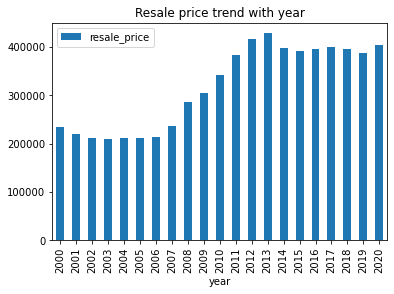

In [17]:
df_year = train_df.groupby(['year'],as_index=True).mean()[['resale_price']]
df_year.plot(kind='bar',title="Resale price trend with year")
plt.savefig("./yeartrend.tiff",dpi=300)

<AxesSubplot:title={'center':'Resale price trend along months'}, xlabel='month_no'>

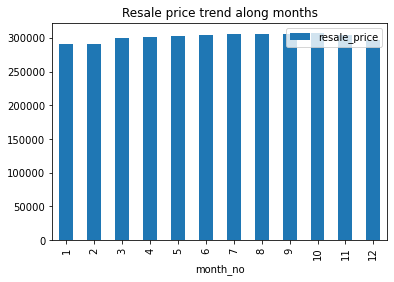

In [18]:
df_month = train_df.groupby(['month_no'],as_index=True).mean()[['resale_price']]
df_month.plot(kind='bar',title="Resale price trend along months")
#plt.savefig("./monthtrend.tiff",dpi=800)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 431732 non-null  object 
 1   flat_type            431732 non-null  object 
 2   block                431732 non-null  object 
 3   street_name          431732 non-null  object 
 4   storey_range         431732 non-null  object 
 5   floor_area_sqm       431732 non-null  float32
 6   flat_model           431732 non-null  object 
 7   eco_category         431732 non-null  object 
 8   lease_commence_date  431732 non-null  uint16 
 9   latitude             431732 non-null  float32
 10  longitude            431732 non-null  float32
 11  elevation            431732 non-null  uint8  
 12  subzone              431732 non-null  object 
 13  planning_area        431732 non-null  object 
 14  region               431732 non-null  object 
 15  resale_price     

### town colum //check this from last notebook

In [20]:
train_df.town.unique()

array(['pasir ris', 'punggol', 'sengkang', 'clementi', 'bukit batok',
       'jurong west', 'geylang', 'yishun', 'bukit panjang', 'serangoon',
       'jurong east', 'kallang/whampoa', 'hougang', 'woodlands',
       'tampines', 'choa chu kang', 'marine parade', 'toa payoh',
       'queenstown', 'bedok', 'bishan', 'ang mo kio', 'sembawang',
       'bukit merah', 'central area', 'bukit timah'], dtype=object)

In [21]:
test_df.town.unique()

array(['bukit batok', 'tampines', 'jurong east', 'ang mo kio', 'clementi',
       'toa payoh', 'bukit panjang', 'sengkang', 'bishan',
       'choa chu kang', 'jurong west', 'sembawang', 'yishun', 'hougang',
       'bukit merah', 'serangoon', 'kallang/whampoa', 'woodlands',
       'bedok', 'queenstown', 'geylang', 'pasir ris', 'marine parade',
       'punggol', 'central area', 'bukit timah'], dtype=object)

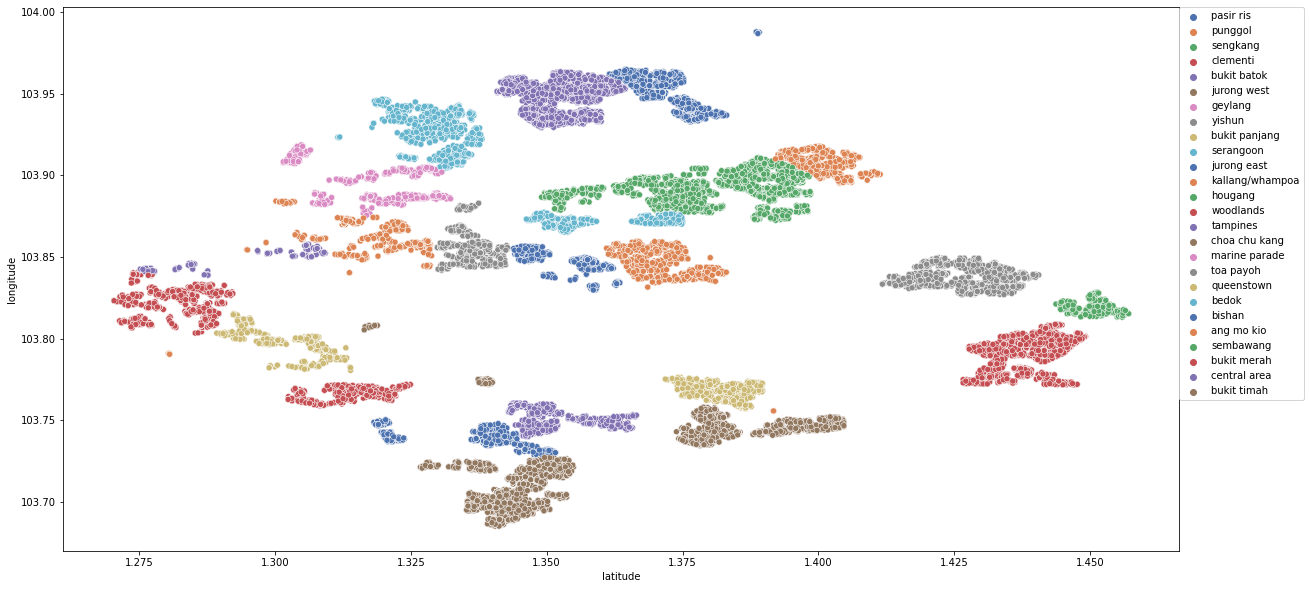

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=train_df.latitude,y=train_df.longitude,hue=train_df.town,palette="deep")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#plt.savefig("./flat_distribution_based_on_town.tiff",dpi=200)

### flat_type

In [23]:
train_df['flat_type'].unique()

array(['4 room', '5-room', '5 room', '3 room', '3-room', 'executive',
       '2 room', '4-room', 'multi generation', '2-room', '1-room',
       '1 room'], dtype=object)

In [24]:
train_df["flat_type"].replace({"5 room": "5-room",
                                       "4 room": "4-room",
                                       "3 room": "3-room",
                                       "2 room": "2-room",
                                       "1 room": "1-room"},
                                      inplace=True)
test_df["flat_type"].replace({"5 room": "5-room",
                                       "4 room": "4-room",
                                       "3 room": "3-room",
                                       "2 room": "2-room",
                                       "1 room": "1-room"},
                                      inplace=True)

In [25]:
train_df['flat_type'].unique()

array(['4-room', '5-room', '3-room', 'executive', '2-room',
       'multi generation', '1-room'], dtype=object)

In [26]:
train_df.groupby(['flat_type']).median()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,resale_price,month_no,year
flat_type,,,,,,,,
1-room,31.0,1975,1.278361,103.819382,0,82170.0,6,2007
2-room,45.0,1973,1.326222,103.845566,0,171000.0,7,2010
3-room,67.0,1980,1.345564,103.842529,0,189000.0,7,2007
4-room,98.0,1992,1.368607,103.838570,0,279000.0,7,2008
5-room,121.0,1997,1.373261,103.838516,0,360000.0,7,2009
executive,146.0,1994,1.371992,103.842873,0,441000.0,7,2009
multi generation,164.0,1987,1.418567,103.840569,0,454500.0,7,2007


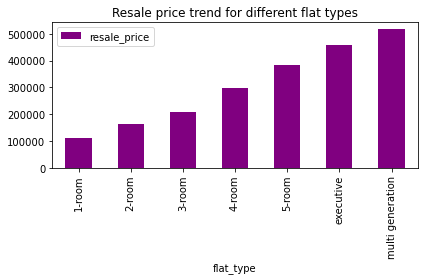

In [27]:
df_flat_type = train_df.groupby(['flat_type'],as_index=True).mean()[['resale_price']]
df_flat_type.plot(kind='bar',title="Resale price trend for different flat types",color='purple')
plt.tight_layout()
#plt.savefig("./flat_type_trend.tiff",dpi=300)

D:\InstalledPrograms\Anaconda\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


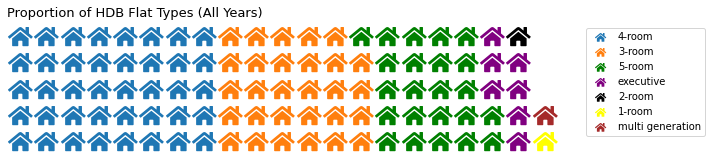

In [28]:
## Waffle chart for flat type - number of rooms
from pywaffle import  Waffle

flattype = dict(train_df['flat_type'].value_counts()/len(train_df)*100)

plt.figure(figsize=(10,10),
    FigureClass=Waffle, 
    plots={
        '211': {
            'values': flattype,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':10},
            'title': {'label': 'Proportion of HDB Flat Types (All Years)', 'loc': 'left', 'fontsize':13}
        },
    },
    rows=5, 
    colors=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'],
    icons='home', 
    font_size=22, 
    icon_legend=True)
#plt.savefig("./flat_type_proportion.tiff",dpi=300)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

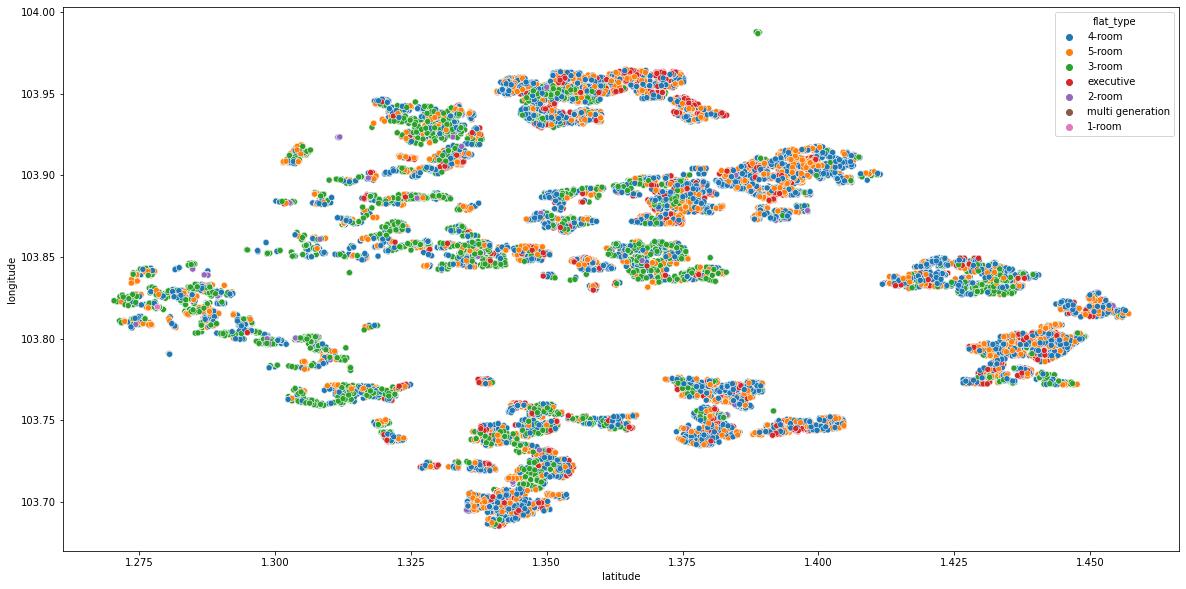

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=train_df.latitude,y=train_df.longitude,hue=train_df.flat_type)
#plt.savefig("./flat_type_spread.tiff",dpi=200)

### block and street_name columns //check this

In [30]:
train_df[["block","street_name"]].head()

,block,street_name
0,440,pasir ris drive 4
1,196B,punggol field
2,404A,fernvale lane
3,375,clementi avenue 4
4,163,bukit batok street 11


### storey_range column

In [31]:
train_df["storey_range"].unique()

array(['01 to 03', '10 to 12', '07 to 09', '13 to 15', '16 to 18',
       '04 to 06', '22 to 24', '01 to 05', '19 to 21', '11 to 15',
       '06 to 10', '25 to 27', '31 to 33', '28 to 30', '37 to 39',
       '34 to 36', '21 to 25', '16 to 20', '40 to 42', '46 to 48',
       '43 to 45', '26 to 30', '36 to 40', '31 to 35', '49 to 51'],
      dtype=object)

In [32]:
def get_storey(x):
            low_level = int(x[0:2])
            high_level = int(x[-2:])
            mean_value = (low_level + high_level) * 0.5
            return mean_value
            # print("Changes storey_range 01 to 03 to 2")
train_df['storey'] = train_df['storey_range'].apply(lambda x: get_storey(x))
train_df = train_df.drop('storey_range',1)
test_df['storey'] = test_df['storey_range'].apply(lambda x: get_storey(x))
test_df = test_df.drop('storey_range',1)

In [33]:
train_df.groupby(['storey']).median()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,resale_price,month_no,year
storey,,,,,,,,
2.0,94.0,1987.0,1.358288,103.839424,0,262800.000,7.0,2008.0
3.0,94.0,1987.5,1.362126,103.838875,0,374400.000,4.0,2012.0
5.0,96.0,1987.0,1.358669,103.840065,0,270000.000,7.0,2008.0
8.0,96.0,1987.0,1.359430,103.840477,0,277200.000,7.0,2008.0
11.0,98.0,1988.0,1.364118,103.839363,0,283500.000,7.0,2008.0
13.0,100.0,1993.0,1.369848,103.837769,0,412200.000,4.0,2012.0
14.0,102.0,1997.0,1.364425,103.849403,0,334800.000,7.0,2009.0
17.0,105.0,1999.0,1.348241,103.845985,0,373500.000,7.0,2010.0
18.0,110.0,2000.0,1.366292,103.840263,0,481500.000,4.0,2012.0


<AxesSubplot:title={'center':'Resale price (SGD) trend with storey'}, ylabel='storey'>

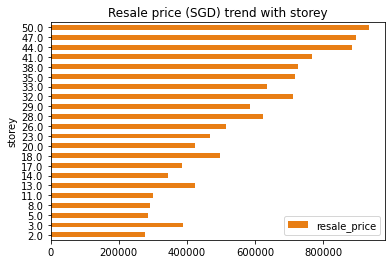

In [34]:
df_storey = train_df.groupby(['storey'],as_index=True).mean()[['resale_price']]
df_storey.plot(kind='barh',color='#E87E14',title="Resale price (SGD) trend with storey")
#plt.savefig("./storey_price_trend.tiff",dpi=300)

### floor_area_sqm column

In [35]:
train_df["floor_area_sqm"].unique()

array([118. , 110. , 112. ,  67. ,  73. , 100. ,  60. , 140. , 122. ,
       103. , 106. ,  90. , 133. , 104. ,  47. , 152. ,  65. , 132. ,
        99. ,  84. ,  74. , 115. , 121. , 131. ,  93. , 176. , 164. ,
       107. ,  92. , 105. , 120. , 101. , 123. ,  68. ,  82. ,  81. ,
        79. ,  64. ,  98. ,  91. ,  69. ,  62. ,  85. , 172. , 126. ,
       134. , 102. ,  83. , 129. ,  94. ,  56. ,  88. , 116. ,  45. ,
        38. , 109. ,  59. ,  87. ,  58. , 146. , 145. , 137. ,  96. ,
       108. , 114. ,  86. ,  89. , 163. , 142. ,  66. , 127. , 138. ,
        95. , 192. ,  72. , 156. ,  76. , 148. , 111. ,  46. , 143. ,
       150. , 147. , 125. , 124. , 144. , 149. ,  63. ,  35. , 119. ,
        60.3,  75. , 113. , 130. , 161. ,  97. ,  40. , 117. ,  51. ,
       135. ,  57. ,  70. ,  52. , 139. , 128. ,  54. ,  77. ,  71. ,
        78. , 141. , 155. , 151. , 136. ,  31. ,  63.1, 153. , 173. ,
       154. , 162. ,  44. ,  42. ,  80. , 169. ,  53. ,  48. , 170. ,
       178. , 158. ,

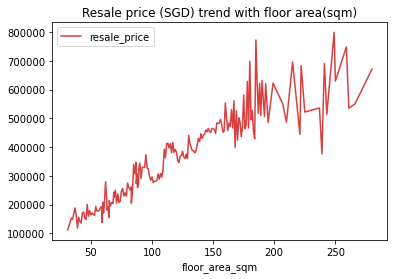

In [37]:
df_floor_area = train_df.groupby(['floor_area_sqm'],as_index=True).mean()[['resale_price']]
df_floor_area.plot(kind='line',color='#D83F3F',title="Resale price (SGD) trend with floor area(sqm)")
#plt.savefig("./floor_area_price_trend.tiff",dpi=300)

In [151]:
df_floor_area.head()

,resale_price
floor_area_sqm,
31.0,111137.312500
34.0,152594.796875
35.0,147538.421875
37.0,188100.000000
38.0,162978.078125


### flat_model column

In [147]:
train_df["flat_model"].unique()

array(['model a', 'improved', 'premium apartment', 'new generation',
       'apartment', 'simplified', 'standard', 'adjoined flat',
       'multi generation', 'maisonette', 'model a2', 'model a maisonette',
       'dbss', 'improved maisonette', 'terrace', 'type s1', 'type s2',
       '2 room', 'premium apartment loft', 'premium maisonette'],
      dtype=object)

<AxesSubplot:xlabel='flat_model'>

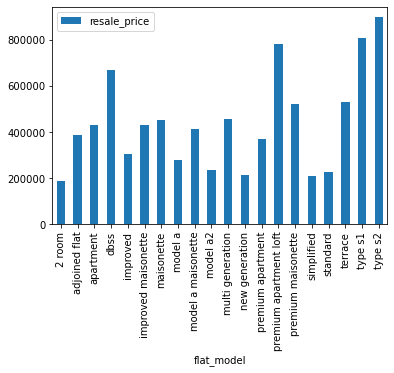

In [176]:
df_flat_model = train_df.groupby(['flat_model'],as_index=True).median()[['resale_price']]
df_flat_model.plot(kind='bar')

<ipython-input-175-b379a84433f0>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  fp.set_yticklabels(ylabels)


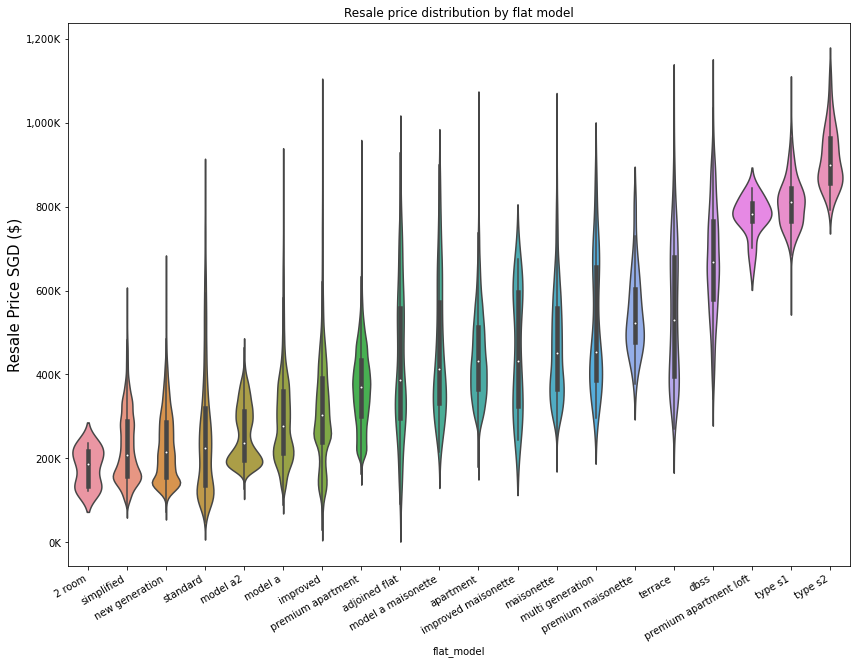

In [175]:
fig = plt.figure(figsize=(14,10))
fp=sns.violinplot(x='flat_model', y='resale_price', data=train_df, width=1,
                order=train_df.groupby('flat_model')['resale_price'].median().sort_values().reset_index()['flat_model'].tolist())
fp.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
fp.set_yticklabels(ylabels)
fp.set_ylabel('Resale Price SGD ($)', size=15)
fp.set_title("Resale price distribution by flat model")
#plt.savefig("./flat_model_price_distribution.tiff",dpi=200)
plt.show()

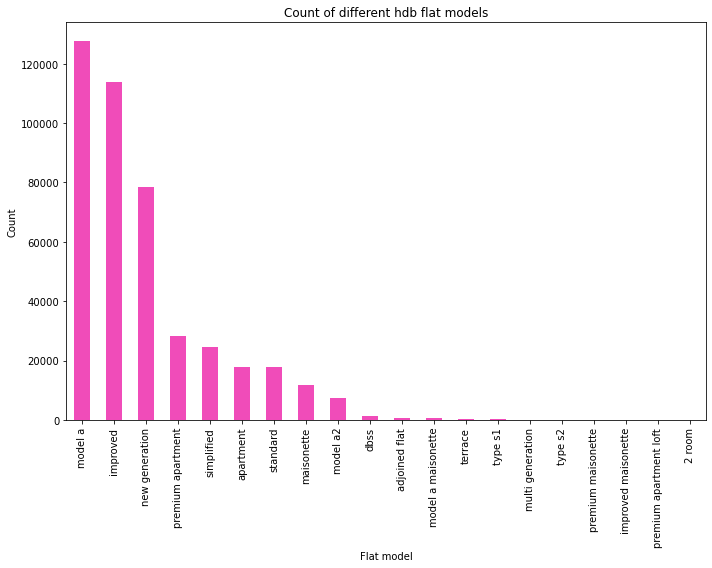

In [204]:
plt.figure(figsize=(10,8))
train_df.flat_model.value_counts().plot(kind='bar',title="Count of different hdb flat models",color="#F04CB9",xlabel="Flat model",ylabel="Count")
plt.tight_layout()
#plt.savefig("./flat_model_count.tiff",dpi=300)

### eco_category column

In [32]:
train_df["eco_category"].unique()

array(['uncategorized'], dtype=object)

In [33]:
train_df = train_df.drop('eco_category',1)
test_df = test_df.drop('eco_category',1)

### lease_commence_date column

In [34]:
train_df["lease_commence_date"].unique()

array([1989, 2003, 2004, 1980, 1985, 1998, 2000, 1988, 1999, 1992, 1990,
       1993, 1984, 2013, 1975, 1995, 1997, 1994, 1986, 1978, 2005, 1974,
       1983, 1987, 2007, 2001, 1970, 1979, 1996, 1982, 2015, 1969, 2006,
       1981, 2010, 2002, 1968, 2016, 1966, 1991, 1976, 2009, 2012, 1971,
       1967, 1977, 2014, 1972, 1973, 2008, 2011, 2017, 2019, 2018],
      dtype=uint16)

<AxesSubplot:xlabel='lease_commence_date'>

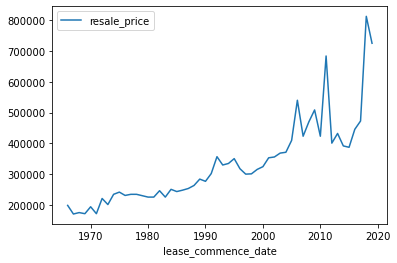

In [35]:
df_lease_commence_date = train_df.groupby(['lease_commence_date'],as_index=True).median()[['resale_price']]
df_lease_commence_date.plot(kind='line')

<AxesSubplot:xlabel='lease_commence_date'>

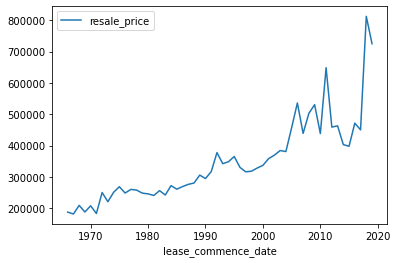

In [36]:
df_lease_commence_date = train_df.groupby(['lease_commence_date'],as_index=True).mean()[['resale_price']]
df_lease_commence_date.plot(kind='line')

In [37]:
train_df[['remaining_lease']] = train_df['lease_commence_date'] + 99 - train_df['year']
train_df[['remaining_lease']] = train_df[['remaining_lease']].astype('uint16')

<AxesSubplot:xlabel='remaining_lease'>

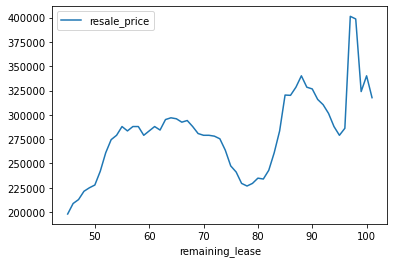

In [38]:
df_remaining_lease = train_df.groupby(['remaining_lease'],as_index=True).median()[['resale_price']]
df_remaining_lease.plot(kind='line')

In [39]:
train_df = train_df.drop('remaining_lease',1)

<ipython-input-209-15d97d90a71f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


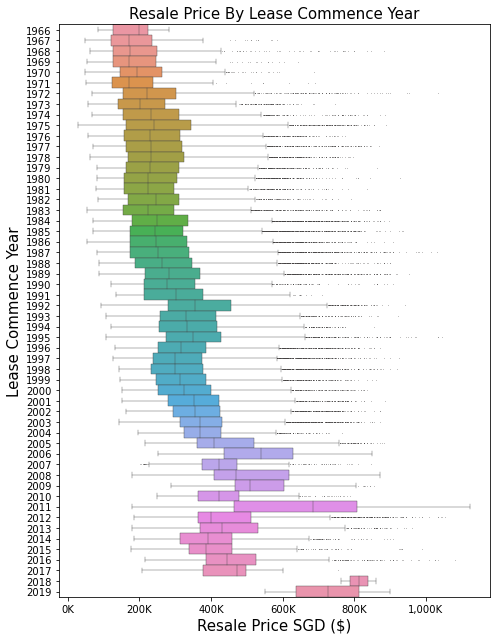

In [209]:
fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='lease_commence_date', x='resale_price', data=train_df, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.tight_layout()
plt.savefig("./lease_commence_date_year.tiff",dpi=300)
plt.show()

### latitude and logitude column

In [40]:
train_df["lat_long"] = list(zip(train_df.latitude, train_df.longitude))
print("Clubbed latitude and longitude together (latitude,longitude)")
#train_df = train_df.drop('latitude',1)
#print("Dropped Column latitude")
#train_df = train_df.drop('longitude',1)
#print("Dropped Column longitude")

Clubbed latitude and longitude together (latitude,longitude)


In [41]:
test_df["lat_long"] = list(zip(test_df.latitude, test_df.longitude))
print("Clubbed latitude and longitude together (latitude,longitude)")
#test_df = test_df.drop('latitude',1)
#print("Dropped Column latitude")
#test_df = test_df.drop('longitude',1)
#print("Dropped Column longitude")

Clubbed latitude and longitude together (latitude,longitude)


### elevation column

In [43]:
train_df["elevation"].unique()

array([0], dtype=uint8)

In [44]:
train_df = train_df.drop('elevation',1)
test_df = test_df.drop('elevation',1)

### subzone column // check this from previous notebook

In [45]:
train_df["subzone"].unique()

array(['pasir ris drive', 'punggol field', 'fernvale', 'clementi north',
       'bukit batok west', 'bukit batok east', 'jurong west central',
       'aljunied', 'northland', 'guilin', 'saujana', 'serangoon north',
       'yuhua west', 'lavender', 'hougang east', 'woodlands east',
       'woodgrove', 'tampines west', 'peng siang', 'senja',
       'marine parade', 'toa payoh central', 'tampines east',
       'bukit batok central', 'midview', 'hougang west', 'holland drive',
       'serangoon garden', 'bedok south', 'bishan east', 'potong pasir',
       'yishun west', 'yio chu kang west', 'rivervale', 'balestier',
       'bedok north', 'lorong ah soo', 'yishun south', 'hong kah',
       'woodlands west', 'compassvale', 'khatib', 'sembawang north',
       'yishun east', 'trafalgar', 'woodlands south', 'braddell',
       'chong boon', 'pasir ris west', 'kovan', 'simei',
       'serangoon central', 'geylang east', 'kaki bukit', 'tanglin halt',
       'choa chu kang north', 'crawford', 'faja

<AxesSubplot:xlabel='subzone'>

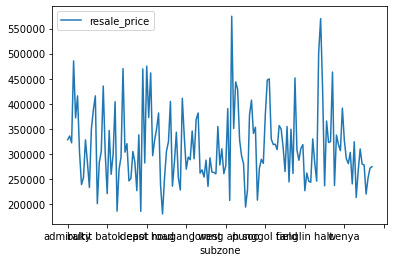

In [46]:
df_subzone = train_df.groupby(['subzone'],as_index=True).mean()[['resale_price']]
df_subzone.plot(kind='line')

### planning_area column // check this from previous notebook

In [47]:
train_df["planning_area"].unique()

array(['pasir ris', 'punggol', 'sengkang', 'clementi', 'bukit batok',
       'jurong west', 'geylang', 'yishun', 'bukit panjang', 'serangoon',
       'jurong east', 'kallang', 'hougang', 'woodlands', 'tampines',
       'choa chu kang', 'marine parade', 'toa payoh', 'queenstown',
       'bedok', 'bishan', 'ang mo kio', 'novena', 'sembawang',
       'bukit merah', 'outram', 'sungei kadut', 'bukit timah', 'rochor',
       'changi', 'tanglin', 'downtown core'], dtype=object)

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=train_df.latitude,y=train_df.longitude,hue=train_df.resale_price,size=train_df.resale_price,sizes=(20, 200))

### region column  // check this from previous notebook

In [210]:
train_df["region"].unique()

array(['east region', 'north-east region', 'west region',
       'central region', 'north region'], dtype=object)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

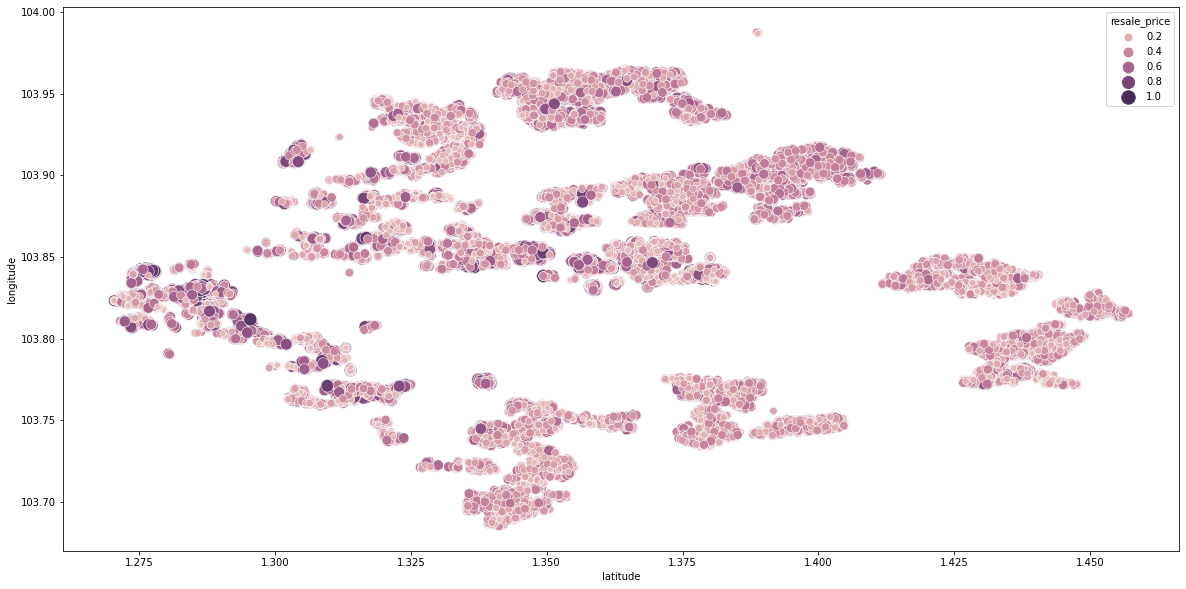

In [216]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=train_df.latitude,y=train_df.longitude,hue=train_df.resale_price,size=train_df.resale_price,sizes=(20, 200))

#plt.savefig("./resale_price_density_across_singapore_sgd.tiff",dpi=200)

In [49]:
train_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,resale_price,month_no,year,storey,lat_long
0,pasir ris,4-room,440,pasir ris drive 4,118.0,model a,1989,1.369008,103.958694,pasir ris drive,pasir ris,east region,209700.0,8,2001,2.0,"(1.3690080642700195, 103.95869445800781)"
1,punggol,5-room,196B,punggol field,110.0,improved,2003,1.399007,103.906990,punggol field,punggol,north-east region,402300.0,10,2014,11.0,"(1.3990070819854736, 103.90699005126953)"
2,sengkang,5-room,404A,fernvale lane,112.0,premium apartment,2004,1.388348,103.873817,fernvale,sengkang,north-east region,351000.0,9,2020,2.0,"(1.3883482217788696, 103.87381744384766)"
3,clementi,3-room,375,clementi avenue 4,67.0,new generation,1980,1.318493,103.766701,clementi north,clementi,west region,151200.0,10,2000,8.0,"(1.3184930086135864, 103.7667007446289)"
4,bukit batok,3-room,163,bukit batok street 11,73.0,model a,1985,1.348150,103.742661,bukit batok west,bukit batok,west region,318600.0,1,2013,8.0,"(1.3481495380401611, 103.74266052246094)"


In [50]:
test_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,month_no,year,storey,lat_long
0,bukit batok,4-room,186,bukit batok west avenue 6,94.0,new generation,1989,1.346581,103.744087,bukit batok west,bukit batok,west region,1,2004,5.0,"(1.3465807437896729, 103.74408721923828)"
1,tampines,5-room,366,tampines street 34,122.0,improved,1997,1.357618,103.961380,tampines east,tampines,east region,11,2001,5.0,"(1.3576176166534424, 103.96138000488281)"
2,jurong east,3-room,206,jurong east street 21,67.0,new generation,1982,1.337804,103.741997,toh guan,jurong east,west region,7,2002,2.0,"(1.337803840637207, 103.74199676513672)"
3,ang mo kio,3-room,180,Ang Mo Kio Avenue 5,82.0,new generation,1981,1.380084,103.849571,yio chu kang east,ang mo kio,north-east region,4,2015,5.0,"(1.380083680152893, 103.84957122802734)"
4,clementi,5-room,356,clementi avenue 2,117.0,standard,1978,1.313960,103.769829,clementi north,clementi,west region,4,2004,2.0,"(1.3139597177505493, 103.76982879638672)"


In [51]:
#train_df.to_csv("./train_2.csv",index=False)
#test_df.to_csv("./test_2.csv",index=False)